In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import seaborn as sns

### Function to Read and Load .cfile Data

In [2]:
def getData(cfileName):
    """
    Given a name of a *.cfile, this function extracts the interleaved
    Inphase-Quadrature data samples and convert it into a numpy array of complex
    data elements. *.cfile format has interleaved I and Q samples where each sample
    is a float32 type. GNURadio Companion (GRC) scripts output data into a file
    though a file sink block in this format.
    Read more in SDR data types: https://github.com/miek/inspectrum
    """
    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")
    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

### Calculate IQ Magnitude

In [3]:
def calculate_IQMagnitude(complex_data):
    # Separate I and Q data
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    magnitude = np.sqrt(I**2 + Q**2)
    
    return magnitude

### Calculate IQ Angle

In [4]:
def calculate_IQ_Angle(complex_data):
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    angle = np.arctan(Q/I)
    return angle
    

### Trunacate Vectors

In [5]:
def truncate_vectors_to_same_size(*vectors):
    # Find the minimum length among all vectors
    min_length = min(len(vec) for vec in vectors)
    # Truncate all vectors to the same length
    return [vec[:min_length] for vec in vectors]

### Sanitize Vectors

In [6]:
def sanitize_vector(vector):
    # Replace NaN or Inf values with zeros or a suitable value
    vector = np.nan_to_num(vector, nan=0.0, posinf=0.0, neginf=0.0)
    return vector

### Reading Data

In [7]:
dataWithOutInterference = getData("./nothing.cfile")

In [8]:
dataWithInterferenceLOSCenter = getData("./centersecond1.cfile")
dataWithInterferenceLOSFirstQuartile = getData("./centerfirst1.cfile")
dataWithInterferenceLOSThirdQuartile = getData("./centerthird1.cfile")

In [10]:
dataWithInterferenceLOSCenter2 = getData("./centersecond2.cfile")
dataWithInterferenceLOSFirstQuartile2 = getData("./centerfirst2.cfile")
dataWithInterferenceLOSThirdQuartile2 = getData("./centerthird2.cfile")

In [10]:
dataWithInterferenceLOSCenter4 = getData("./centersecond4.cfile")
dataWithInterferenceLOSFirstQuartile4 = getData("./centerfirst4.cfile")
dataWithInterferenceLOSThirdQuartile4 = getData("./centerthird4.cfile")

In [9]:
dataWithInterferenceNLOSLeftCenter = getData("./leftsecond1.cfile")
dataWithInterferenceNLOSLeftFirstQuartile = getData("./leftfirst1.cfile")
dataWithInterferenceNLOSLeftThirdQuartile = getData("./leftthird1.cfile")

In [12]:
dataWithInterferenceNLOSLeftCenter2 = getData("./leftsecond2.cfile")
dataWithInterferenceNLOSLeftFirstQuartile2 = getData("./leftfirst2.cfile")
dataWithInterferenceNLOSLeftThirdQuartile2 = getData("./leftthird2.cfile")

In [13]:
dataWithInterferenceNLOSLeftCenter4 = getData("./leftsecond4.cfile")
dataWithInterferenceNLOSLeftFirstQuartile4 = getData("./leftfirst4.cfile")
dataWithInterferenceNLOSLeftThirdQuartile4 = getData("./leftthird4.cfile")

In [11]:
dataWithInterferenceNLOSRightCenter = getData("./rightsecond1.cfile")
dataWithInterferenceNLOSRightFirstQuartile = getData("./rightfirst1.cfile")
dataWithInterferenceNLOSRightThirdQuartile = getData("./rightthird1.cfile")

In [15]:
dataWithInterferenceNLOSRightCenter2 = getData("./rightsecond2.cfile")
dataWithInterferenceNLOSRightFirstQuartile2 = getData("./rightfirst2.cfile")
dataWithInterferenceNLOSRightThirdQuartile2 = getData("./rightthird2.cfile")

In [16]:
dataWithInterferenceNLOSRightCenter4 = getData("./rightsecond4.cfile")
dataWithInterferenceNLOSRightFirstQuartile4 = getData("./rightfirst4.cfile")
dataWithInterferenceNLOSRightThirdQuartile4 = getData("./rightthird4.cfile")

### Remove No Obstruction

In [5]:
dataWithInterferenceLOSCenterCleaned = dataWithInterferenceLOSCenter - dataWithOutInterference
dataWithInterferenceLOSFirstQuartileCleaned = dataWithInterferenceLOSFirstQuartile - dataWithOutInterference
dataWithInterferenceLOSThirdQuartileCleaned = dataWithInterferenceLOSThirdQuartile - dataWithOutInterference

ValueError: operands could not be broadcast together with shapes (201982183,) (233439889,) 

In [ ]:
dataWithInterferenceLOSCenterCleaned2 = dataWithInterferenceLOSCenter2 - dataWithOutInterference
dataWithInterferenceLOSFirstQuartileCleaned2 = dataWithInterferenceLOSFirstQuartile2 - dataWithOutInterference
dataWithInterferenceLOSThirdQuartileCleaned2 = dataWithInterferenceLOSThirdQuartile2 - dataWithOutInterference

In [ ]:
dataWithInterferenceLOSCenterCleaned4 = dataWithInterferenceLOSCenter4 - dataWithOutInterference
dataWithInterferenceLOSFirstQuartileCleaned4 = dataWithInterferenceLOSFirstQuartile4 - dataWithOutInterference
dataWithInterferenceLOSThirdQuartileCleaned4 = dataWithInterferenceLOSThirdQuartile4 - dataWithOutInterference

In [ ]:
dataWithInterferenceNLOSLeftCenterCleaned = dataWithInterferenceNLOSLeftCenter - dataWithOutInterference
dataWithInterferenceNLOSLeftFirstQuartileCleaned = dataWithInterferenceNLOSLeftFirstQuartile - dataWithOutInterference
dataWithInterferenceNLOSLeftThirdQuartileCleaned = dataWithInterferenceNLOSLeftThirdQuartile - dataWithOutInterference

In [ ]:
dataWithInterferenceNLOSLeftCenterCleaned2 = dataWithInterferenceNLOSLeftCenter2 - dataWithOutInterference
dataWithInterferenceNLOSLeftFirstQuartileCleaned2 = dataWithInterferenceNLOSLeftFirstQuartile2 - dataWithOutInterference
dataWithInterferenceNLOSLeftThirdQuartileCleaned2 = dataWithInterferenceNLOSLeftThirdQuartile2 - dataWithOutInterference

In [ ]:
dataWithInterferenceNLOSLeftCenterCleaned4 = dataWithInterferenceNLOSLeftCenter4 - dataWithOutInterference
dataWithInterferenceNLOSLeftFirstQuartileCleaned4 = dataWithInterferenceNLOSLeftFirstQuartile4 - dataWithOutInterference
dataWithInterferenceNLOSLeftThirdQuartileCleaned4 = dataWithInterferenceNLOSLeftThirdQuartile4 - dataWithOutInterference

In [ ]:
dataWithInterferenceNLOSRightCenterCleaned = dataWithInterferenceNLOSRightCenter - dataWithOutInterference
dataWithInterferenceNLOSRightFirstQuartileCleaned = dataWithInterferenceNLOSRightFirstQuartile - dataWithOutInterference
dataWithInterferenceNLOSRightThirdQuartileCleaned = dataWithInterferenceNLOSRightThirdQuartile - dataWithOutInterference

In [ ]:
dataWithInterferenceNLOSRightCenterCleaned2 = dataWithInterferenceNLOSRightCenter2 - dataWithOutInterference
dataWithInterferenceNLOSRightFirstQuartileCleaned2 = dataWithInterferenceNLOSRightFirstQuartile2 - dataWithOutInterference
dataWithInterferenceNLOSRightThirdQuartileCleaned2 = dataWithInterferenceNLOSRightThirdQuartile2 - dataWithOutInterference

In [ ]:
dataWithInterferenceNLOSRightCenterCleaned4 = dataWithInterferenceNLOSRightCenter4 - dataWithOutInterference
dataWithInterferenceNLOSRightFirstQuartileCleaned4 = dataWithInterferenceNLOSRightFirstQuartile4 - dataWithOutInterference
dataWithInterferenceNLOSRightThirdQuartileCleaned4 = dataWithInterferenceNLOSRightThirdQuartile4 - dataWithOutInterference

### Amplitude Vector

In [12]:
Amplitude_Vectors_Raw1 = [
    calculate_IQMagnitude(dataWithOutInterference),
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftFirstQuartile),
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftCenter),
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftThirdQuartile),
    calculate_IQMagnitude(dataWithInterferenceLOSFirstQuartile),
    calculate_IQMagnitude(dataWithInterferenceLOSCenter),
    calculate_IQMagnitude(dataWithInterferenceLOSThirdQuartile),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightFirstQuartile),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightCenter),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightThirdQuartile),
]

In [13]:
Amplitude_Vectors_Raw2 = [
    # calculate_IQMagnitude(dataWithInterferenceNLOSLeftFirstQuartile2),
    # calculate_IQMagnitude(dataWithInterferenceNLOSLeftCenter2),
    # calculate_IQMagnitude(dataWithInterferenceNLOSLeftThirdQuartile2),
    calculate_IQMagnitude(dataWithInterferenceLOSFirstQuartile2),
    calculate_IQMagnitude(dataWithInterferenceLOSCenter2),
    # calculate_IQMagnitude(dataWithInterferenceLOSThirdQuartile2),
    # calculate_IQMagnitude(dataWithInterferenceNLOSRightFirstQuartile2),
    # calculate_IQMagnitude(dataWithInterferenceNLOSRightCenter2),
    # calculate_IQMagnitude(dataWithInterferenceNLOSRightThirdQuartile2),
]


In [19]:
Amplitude_Vectors_Raw4 = [
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftFirstQuartile4),
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftCenter4),
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftThirdQuartile4),
    calculate_IQMagnitude(dataWithInterferenceLOSFirstQuartile4),
    calculate_IQMagnitude(dataWithInterferenceLOSCenter4),
    calculate_IQMagnitude(dataWithInterferenceLOSThirdQuartile4),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightFirstQuartile4),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightCenter4),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightThirdQuartile4),
]

In [14]:
# Amplitude_Vectors_Raw = (Amplitude_Vectors_Raw1 + Amplitude_Vectors_Raw2 +  Amplitude_Vectors_Raw4)
Amplitude_Vectors_Raw = (Amplitude_Vectors_Raw1 + Amplitude_Vectors_Raw2)

In [15]:
Amplitude_Vectors = truncate_vectors_to_same_size(*Amplitude_Vectors_Raw)

# Map back truncated vectors to their variables
(
    amplitude_WithOutInterference,

    amplitude_NLOSLeftFirstQuartile,
    amplitude_NLOSLeftCenter,
    amplitude_NLOSLeftThirdQuartile,
    amplitude_LOSFirstQuartile,
    amplitude_LOSCenter,
    amplitude_LOSThirdQuartile,
    amplitude_NLOSRightFirstQuartile,
    amplitude_NLOSRightCenter,
    amplitude_NLOSRightThirdQuartile,

    # amplitude_NLOSLeftFirstQuartile2,
    # amplitude_NLOSLeftCenter2,
    # amplitude_NLOSLeftThirdQuartile2,
    amplitude_LOSFirstQuartile2,
    amplitude_LOSCenter2,
    # amplitude_LOSThirdQuartile2,
    # amplitude_NLOSRightFirstQuartile2,
    # amplitude_NLOSRightCenter2,
    # amplitude_NLOSRightThirdQuartile2,

    # amplitude_NLOSLeftFirstQuartile4,
    # amplitude_NLOSLeftCenter4,
    # amplitude_NLOSLeftThirdQuartile4,
    # amplitude_LOSFirstQuartile4,
    # amplitude_LOSCenter4,
    # amplitude_LOSThirdQuartile4,
    # amplitude_NLOSRightFirstQuartile4,
    # amplitude_NLOSRightCenter4,
    # amplitude_NLOSRightThirdQuartile4,
    
) = Amplitude_Vectors

In [16]:
amplitude_NLOSLeftFirstQuartile_Cleaned = amplitude_NLOSLeftFirstQuartile - amplitude_WithOutInterference
amplitude_NLOSLeftCenter_Cleaned = amplitude_NLOSLeftCenter - amplitude_WithOutInterference
amplitude_NLOSLeftThirdQuartile_Cleaned = amplitude_NLOSLeftThirdQuartile - amplitude_WithOutInterference
amplitude_LOSFirstQuartile_Cleaned = amplitude_LOSFirstQuartile - amplitude_WithOutInterference
amplitude_LOSCenter_Cleaned = amplitude_LOSCenter - amplitude_WithOutInterference
amplitude_LOSThirdQuartile_Cleaned =  amplitude_LOSThirdQuartile - amplitude_WithOutInterference
amplitude_NLOSRightFirstQuartile_Cleaned = amplitude_NLOSRightFirstQuartile - amplitude_WithOutInterference
amplitude_NLOSRightCenter_Cleaned = amplitude_NLOSRightCenter - amplitude_WithOutInterference
amplitude_NLOSRightThirdQuartile_Cleaned = amplitude_NLOSRightThirdQuartile - amplitude_WithOutInterference

amplitude_LOSFirstQuartile2_Cleaned =  amplitude_LOSFirstQuartile2 - amplitude_WithOutInterference
amplitude_LOSCenter2_Cleaned =  amplitude_LOSCenter2 - amplitude_WithOutInterference


In [28]:
Amplitude_Vector_Eucleidian_LOSFirstQuartile2 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile, amplitude_LOSFirstQuartile2),
        distance.euclidean(amplitude_NLOSLeftCenter, amplitude_LOSFirstQuartile2),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile, amplitude_LOSFirstQuartile2),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile, amplitude_LOSFirstQuartile2),
        distance.euclidean(amplitude_LOSCenter, amplitude_LOSFirstQuartile2),
        distance.euclidean(amplitude_LOSThirdQuartile, amplitude_LOSFirstQuartile2),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile, amplitude_LOSFirstQuartile2),
        distance.euclidean(amplitude_NLOSRightCenter, amplitude_LOSFirstQuartile2),
        distance.euclidean(amplitude_NLOSRightThirdQuartile, amplitude_LOSFirstQuartile2),
    ],
])

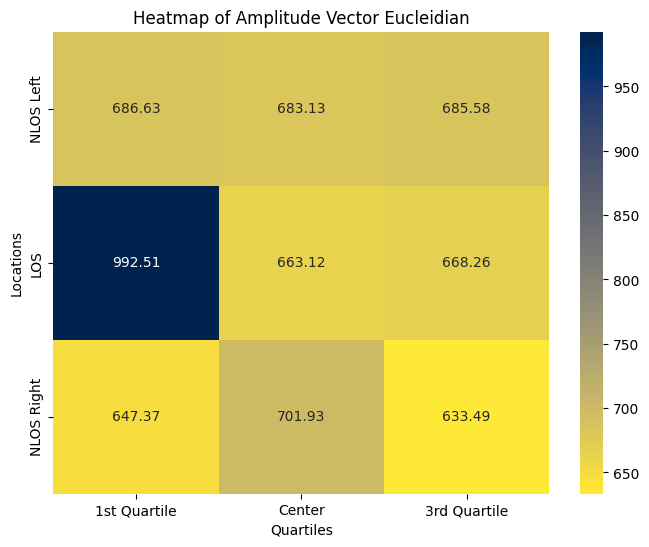

In [29]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_LOSFirstQuartile2, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [26]:
Amplitude_Vector_Eucleidian_LOSCenter2 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile, amplitude_LOSCenter2),
        distance.euclidean(amplitude_NLOSLeftCenter, amplitude_LOSCenter2),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile, amplitude_LOSCenter2),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile, amplitude_LOSCenter2),
        distance.euclidean(amplitude_LOSCenter, amplitude_LOSCenter2),
        distance.euclidean(amplitude_LOSThirdQuartile, amplitude_LOSCenter2),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile, amplitude_LOSCenter2),
        distance.euclidean(amplitude_NLOSRightCenter, amplitude_LOSCenter2),
        distance.euclidean(amplitude_NLOSRightThirdQuartile, amplitude_LOSCenter2),
    ],
])

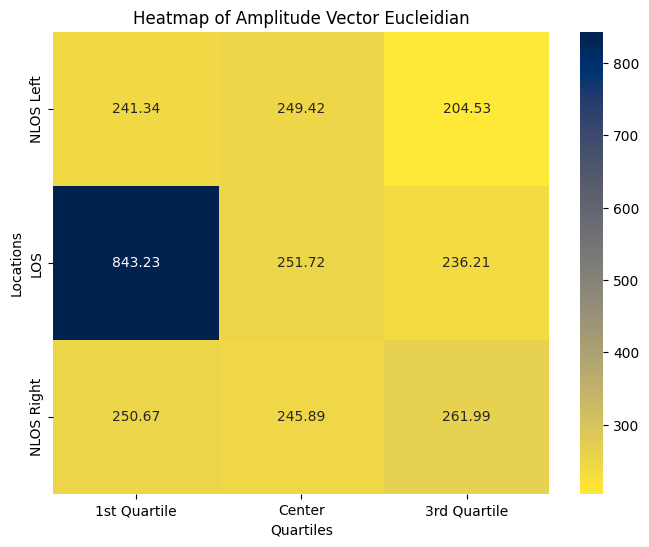

In [27]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_LOSCenter2, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [30]:
Amplitude_Vector_Eucleidian_LOSThirdQuartile2 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile, amplitude_LOSThirdQuartile2),
        distance.euclidean(amplitude_NLOSLeftCenter, amplitude_LOSThirdQuartile2),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile, amplitude_LOSThirdQuartile2),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile, amplitude_LOSThirdQuartile2),
        distance.euclidean(amplitude_LOSCenter, amplitude_LOSThirdQuartile2),
        distance.euclidean(amplitude_LOSThirdQuartile, amplitude_LOSThirdQuartile2),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile, amplitude_LOSThirdQuartile2),
        distance.euclidean(amplitude_NLOSRightCenter, amplitude_LOSThirdQuartile2),
        distance.euclidean(amplitude_NLOSRightThirdQuartile, amplitude_LOSThirdQuartile2),
    ],
])

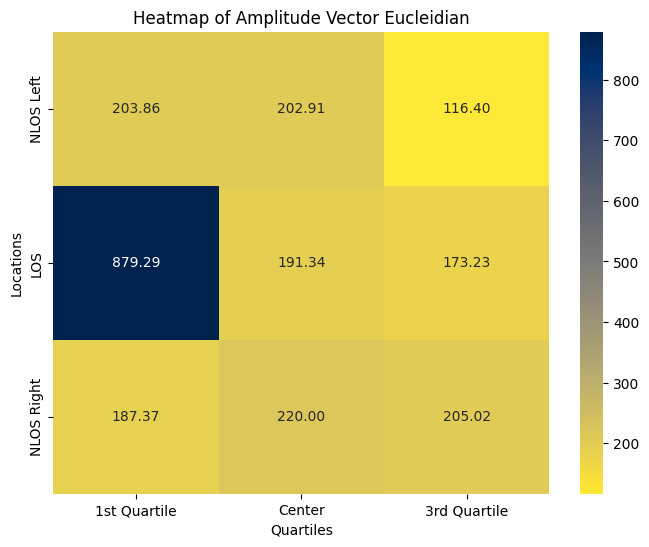

In [31]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_LOSThirdQuartile2, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [32]:
Amplitude_Vector_Eucleidian_LOSFirstQuartile4 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile, amplitude_LOSFirstQuartile4),
        distance.euclidean(amplitude_NLOSLeftCenter, amplitude_LOSFirstQuartile4),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile, amplitude_LOSFirstQuartile4),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile, amplitude_LOSFirstQuartile4),
        distance.euclidean(amplitude_LOSCenter, amplitude_LOSFirstQuartile4),
        distance.euclidean(amplitude_LOSThirdQuartile, amplitude_LOSFirstQuartile4),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile, amplitude_LOSFirstQuartile4),
        distance.euclidean(amplitude_NLOSRightCenter, amplitude_LOSFirstQuartile4),
        distance.euclidean(amplitude_NLOSRightThirdQuartile, amplitude_LOSFirstQuartile4),
    ],
])

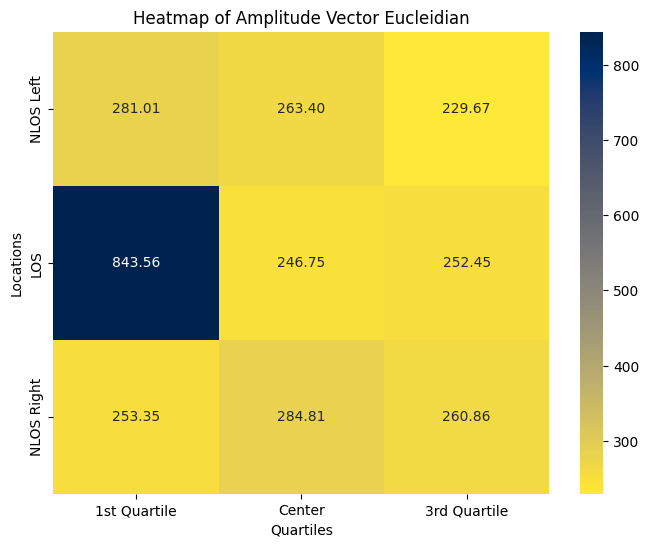

In [33]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_LOSFirstQuartile4, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [34]:
Amplitude_Vector_Eucleidian_LOSCenter4 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile, amplitude_LOSCenter4),
        distance.euclidean(amplitude_NLOSLeftCenter, amplitude_LOSCenter4),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile, amplitude_LOSCenter4),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile, amplitude_LOSCenter4),
        distance.euclidean(amplitude_LOSCenter, amplitude_LOSCenter4),
        distance.euclidean(amplitude_LOSThirdQuartile, amplitude_LOSCenter4),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile, amplitude_LOSCenter4),
        distance.euclidean(amplitude_NLOSRightCenter, amplitude_LOSCenter4),
        distance.euclidean(amplitude_NLOSRightThirdQuartile, amplitude_LOSCenter4),
    ],
])

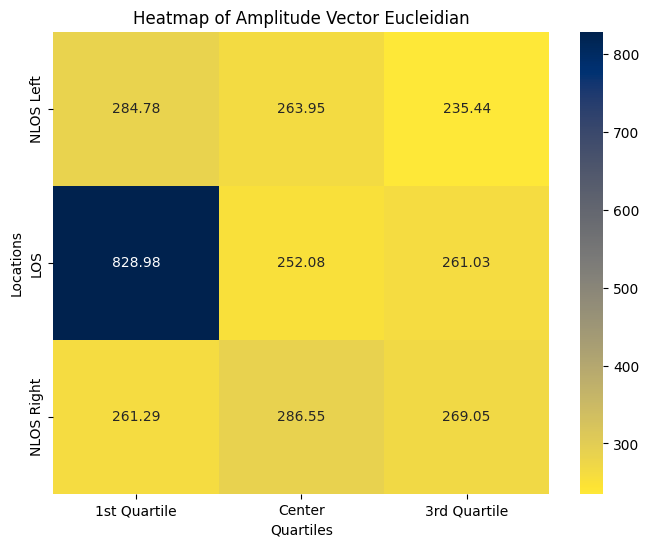

In [35]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_LOSCenter4, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [24]:
Amplitude_Vector_Eucleidian_2LOSCenter4 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile2, amplitude_LOSCenter4),
        distance.euclidean(amplitude_NLOSLeftCenter2, amplitude_LOSCenter4),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile2, amplitude_LOSCenter4),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile2, amplitude_LOSCenter4),
        distance.euclidean(amplitude_LOSCenter2, amplitude_LOSCenter4),
        distance.euclidean(amplitude_LOSThirdQuartile2, amplitude_LOSCenter4),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile2, amplitude_LOSCenter4),
        distance.euclidean(amplitude_NLOSRightCenter2, amplitude_LOSCenter4),
        distance.euclidean(amplitude_NLOSRightThirdQuartile2, amplitude_LOSCenter4),
    ],
])

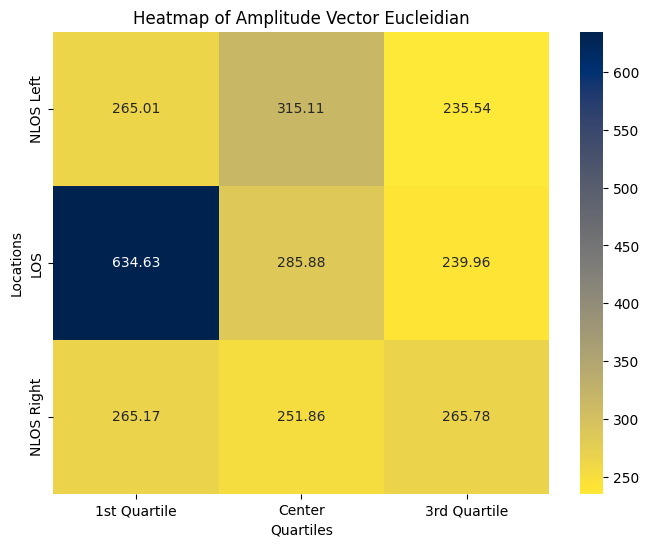

In [25]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_2LOSCenter4, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [36]:
Amplitude_Vector_Eucleidian_NLOSLeftFirstQuartile2 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile, amplitude_NLOSLeftFirstQuartile2),
        distance.euclidean(amplitude_NLOSLeftCenter, amplitude_NLOSLeftFirstQuartile2),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile, amplitude_NLOSLeftFirstQuartile2),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile, amplitude_NLOSLeftFirstQuartile2),
        distance.euclidean(amplitude_LOSCenter, amplitude_NLOSLeftFirstQuartile2),
        distance.euclidean(amplitude_LOSThirdQuartile, amplitude_NLOSLeftFirstQuartile2),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile, amplitude_NLOSLeftFirstQuartile2),
        distance.euclidean(amplitude_NLOSRightCenter, amplitude_NLOSLeftFirstQuartile2),
        distance.euclidean(amplitude_NLOSRightThirdQuartile, amplitude_NLOSLeftFirstQuartile2),
    ],
])

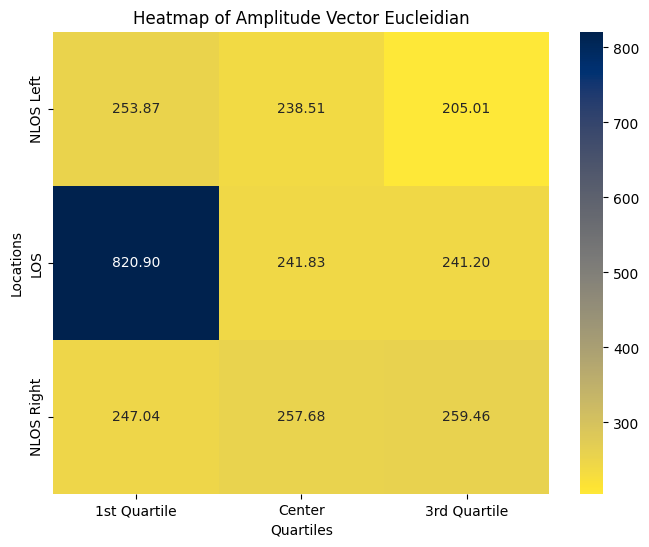

In [37]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_NLOSLeftFirstQuartile2, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [38]:
Amplitude_Vector_Eucleidian_NLOSLeftThirdQuartile2 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile, amplitude_NLOSLeftThirdQuartile2),
        distance.euclidean(amplitude_NLOSLeftCenter, amplitude_NLOSLeftThirdQuartile2),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile, amplitude_NLOSLeftThirdQuartile2),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile, amplitude_NLOSLeftThirdQuartile2),
        distance.euclidean(amplitude_LOSCenter, amplitude_NLOSLeftThirdQuartile2),
        distance.euclidean(amplitude_LOSThirdQuartile, amplitude_NLOSLeftThirdQuartile2),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile, amplitude_NLOSLeftThirdQuartile2),
        distance.euclidean(amplitude_NLOSRightCenter, amplitude_NLOSLeftThirdQuartile2),
        distance.euclidean(amplitude_NLOSRightThirdQuartile, amplitude_NLOSLeftThirdQuartile2),
    ],
])

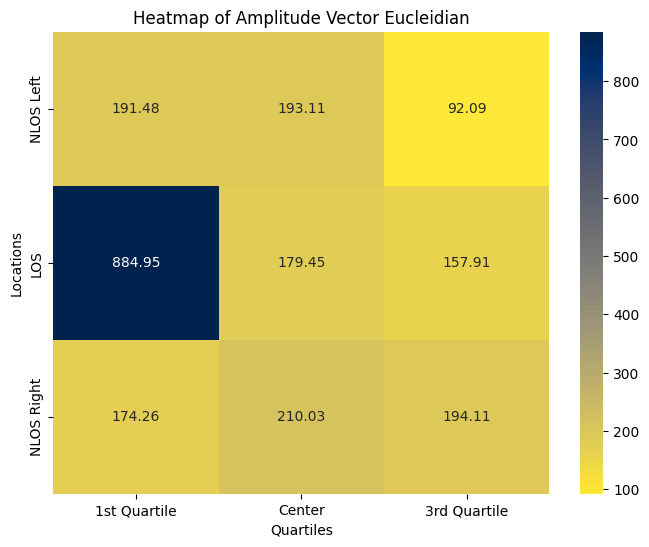

In [39]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_NLOSLeftThirdQuartile2, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [42]:
Amplitude_Vector_Eucleidian_NLOSRightThirdQuartile2 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile, amplitude_NLOSRightThirdQuartile2),
        distance.euclidean(amplitude_NLOSLeftCenter, amplitude_NLOSRightThirdQuartile2),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile, amplitude_NLOSRightThirdQuartile2),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile, amplitude_NLOSRightThirdQuartile2),
        distance.euclidean(amplitude_LOSCenter, amplitude_NLOSRightThirdQuartile2),
        distance.euclidean(amplitude_LOSThirdQuartile, amplitude_NLOSRightThirdQuartile2),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile, amplitude_NLOSRightThirdQuartile2),
        distance.euclidean(amplitude_NLOSRightCenter, amplitude_NLOSRightThirdQuartile2),
        distance.euclidean(amplitude_NLOSRightThirdQuartile, amplitude_NLOSRightThirdQuartile2),
    ],
])

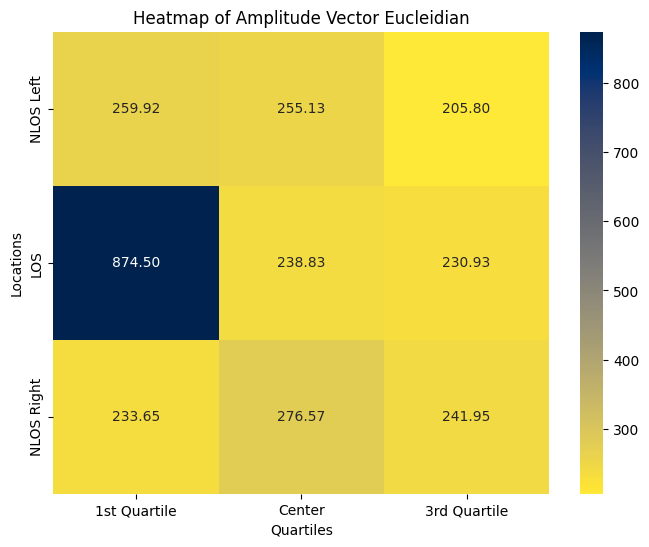

In [43]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_NLOSRightThirdQuartile2, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [17]:
Amplitude_Vector_Eucleidian_LOSFirstQuartile2_Cleaned = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Cleaned, amplitude_LOSFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Cleaned, amplitude_LOSFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Cleaned, amplitude_LOSFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Cleaned, amplitude_LOSFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Cleaned, amplitude_LOSFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Cleaned, amplitude_LOSFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Cleaned, amplitude_LOSFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Cleaned, amplitude_LOSFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Cleaned, amplitude_LOSFirstQuartile2_Cleaned),
    ],
])

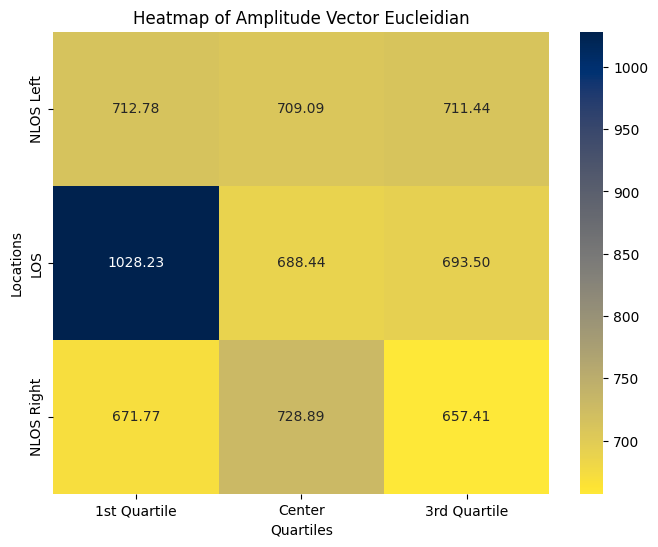

In [18]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_LOSFirstQuartile2_Cleaned, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [20]:
Amplitude_Vector_Eucleidian_LOSCenter2_Cleaned = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Cleaned, amplitude_LOSCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Cleaned, amplitude_LOSCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Cleaned, amplitude_LOSCenter2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Cleaned, amplitude_LOSCenter2_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Cleaned, amplitude_LOSCenter2_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Cleaned, amplitude_LOSCenter2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Cleaned, amplitude_LOSCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Cleaned, amplitude_LOSCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Cleaned, amplitude_LOSCenter2_Cleaned),
    ],
])

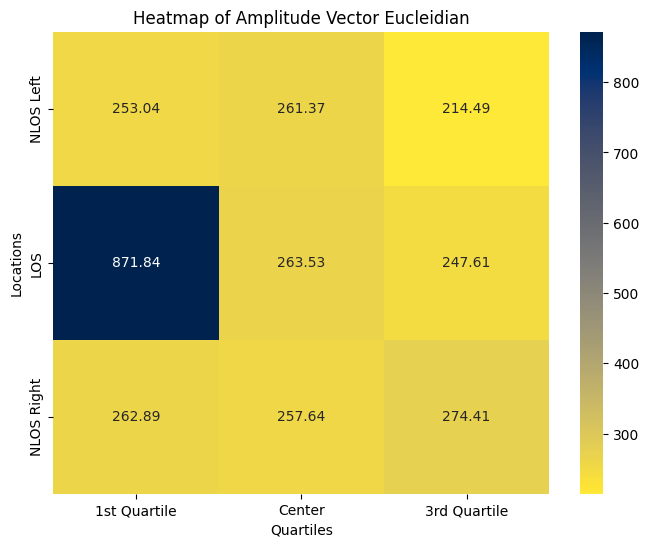

In [21]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_LOSCenter2_Cleaned, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [22]:
Amplitude_Vector_Eucleidian_LOSCenter_Cleaned = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Cleaned, amplitude_LOSCenter_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Cleaned, amplitude_LOSCenter_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Cleaned, amplitude_LOSCenter_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Cleaned, amplitude_LOSCenter_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Cleaned, amplitude_LOSCenter_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Cleaned, amplitude_LOSCenter_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Cleaned, amplitude_LOSCenter_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Cleaned, amplitude_LOSCenter_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Cleaned, amplitude_LOSCenter_Cleaned),
    ],
])

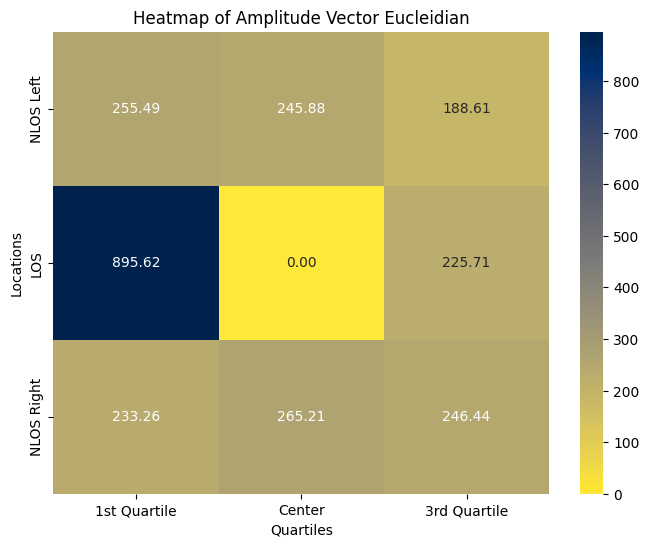

In [23]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_LOSCenter_Cleaned, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [24]:
Amplitude_Vector_Eucleidian_LOSCenter = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile, amplitude_LOSCenter),
        distance.euclidean(amplitude_NLOSLeftCenter, amplitude_LOSCenter),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile, amplitude_LOSCenter),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile, amplitude_LOSCenter),
        distance.euclidean(amplitude_LOSCenter, amplitude_LOSCenter),
        distance.euclidean(amplitude_LOSThirdQuartile, amplitude_LOSCenter),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile, amplitude_LOSCenter),
        distance.euclidean(amplitude_NLOSRightCenter, amplitude_LOSCenter),
        distance.euclidean(amplitude_NLOSRightThirdQuartile, amplitude_LOSCenter),
    ],
])

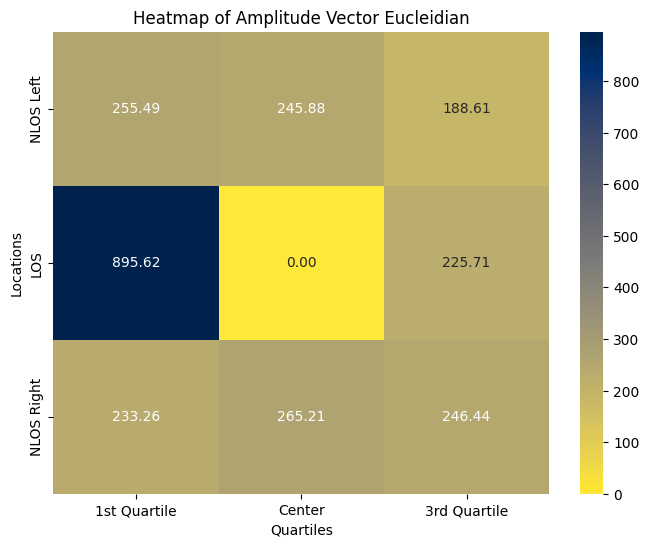

In [25]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_LOSCenter, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

### Phasse Vector

In [12]:
Phase_Vectors_Raw1 = [
    sanitize_vector(calculate_IQ_Angle(dataWithOutInterference)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftFirstQuartile)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftCenter)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftThirdQuartile)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSFirstQuartile)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSCenter)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSThirdQuartile)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightFirstQuartile)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightCenter)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightThirdQuartile)),
]

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_8304\2377027175.py:6: RuntimeWarning: divide by zero encountered in divide
  angle = np.arctan(Q/I)
C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_8304\2377027175.py:6: RuntimeWarning: invalid value encountered in divide
  angle = np.arctan(Q/I)


In [13]:
Phase_Vectors_Raw2 = [
    # sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftFirstQuartile2)),
    # sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftCenter2)),
    # sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftThirdQuartile2)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSFirstQuartile2)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSCenter2)),
    # sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSThirdQuartile2)),
    # sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightFirstQuartile2)),
    # sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightCenter2)),
    # sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightThirdQuartile2)),
]

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_8304\2377027175.py:6: RuntimeWarning: divide by zero encountered in divide
  angle = np.arctan(Q/I)
C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_8304\2377027175.py:6: RuntimeWarning: invalid value encountered in divide
  angle = np.arctan(Q/I)


In [20]:
Phase_Vectors_Raw4 = [
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftFirstQuartile4)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftCenter4)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftThirdQuartile4)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSFirstQuartile4)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSCenter4)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSThirdQuartile4)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightFirstQuartile4)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightCenter4)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightThirdQuartile4)),
]

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_6900\2377027175.py:6: RuntimeWarning: divide by zero encountered in divide
  angle = np.arctan(Q/I)
C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_6900\2377027175.py:6: RuntimeWarning: invalid value encountered in divide
  angle = np.arctan(Q/I)


In [14]:
# Phase_Vectors_Raw = (Phase_Vectors_Raw1 + Phase_Vectors_Raw2 +  Phase_Vectors_Raw4)
Phase_Vectors_Raw = (Phase_Vectors_Raw1 + Phase_Vectors_Raw2)

In [15]:
Phase_Vectors = truncate_vectors_to_same_size(*Phase_Vectors_Raw)

# Map back truncated vectors to their variables
(
    phase_WithOutInterference,
    
    phase_NLOSLeftFirstQuartile,
    phase_NLOSLeftCenter,
    phase_NLOSLeftThirdQuartile,
    phase_LOSFirstQuartile,
    phase_LOSCenter,
    phase_LOSThirdQuartile,
    phase_NLOSRightFirstQuartile,
    phase_NLOSRightCenter,
    phase_NLOSRightThirdQuartile,

    # phase_NLOSLeftFirstQuartile2,
    # phase_NLOSLeftCenter2,
    # phase_NLOSLeftThirdQuartile2,
    phase_LOSFirstQuartile2,
    phase_LOSCenter2,
    # phase_LOSThirdQuartile2,
    # phase_NLOSRightFirstQuartile2,
    # phase_NLOSRightCenter2,
    # phase_NLOSRightThirdQuartile2,

    # phase_NLOSLeftFirstQuartile4,
    # phase_NLOSLeftCenter4,
    # phase_NLOSLeftThirdQuartile4,
    # phase_LOSFirstQuartile4,
    # phase_LOSCenter4,
    # phase_LOSThirdQuartile4,
    # phase_NLOSRightFirstQuartile4,
    # phase_NLOSRightCenter4,
    # phase_NLOSRightThirdQuartile4,
) = Phase_Vectors

In [16]:
phase_NLOSLeftFirstQuartile_Cleaned = phase_NLOSLeftFirstQuartile - phase_WithOutInterference
phase_NLOSLeftCenter_Cleaned = phase_NLOSLeftCenter - phase_WithOutInterference
phase_NLOSLeftThirdQuartile_Cleaned =  phase_NLOSLeftThirdQuartile - phase_WithOutInterference
phase_LOSFirstQuartile_Cleaned = phase_LOSFirstQuartile - phase_WithOutInterference
phase_LOSCenter_Cleaned = phase_LOSCenter - phase_WithOutInterference
phase_LOSThirdQuartile_Cleaned = phase_LOSThirdQuartile - phase_WithOutInterference
phase_NLOSRightFirstQuartile_Cleaned = phase_NLOSRightFirstQuartile - phase_WithOutInterference
phase_NLOSRightCenter_Cleaned = phase_NLOSRightCenter - phase_WithOutInterference
phase_NLOSRightThirdQuartile_Cleaned = phase_NLOSRightThirdQuartile - phase_WithOutInterference

phase_LOSFirstQuartile2_Cleaned = phase_LOSFirstQuartile2 - phase_WithOutInterference
phase_LOSCenter2_Cleaned = phase_LOSCenter2 - phase_WithOutInterference

In [24]:
Phase_Vector_Euclidean_LOSCenter2 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile, phase_LOSCenter2),
        distance.euclidean(phase_NLOSLeftCenter, phase_LOSCenter2),
        distance.euclidean(phase_NLOSLeftThirdQuartile, phase_LOSCenter2),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile, phase_LOSCenter2),
        distance.euclidean(phase_LOSCenter, phase_LOSCenter2),
        distance.euclidean(phase_LOSThirdQuartile, phase_LOSCenter2),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile, phase_LOSCenter2),
        distance.euclidean(phase_NLOSRightCenter, phase_LOSCenter2),
        distance.euclidean(phase_NLOSRightThirdQuartile, phase_LOSCenter2),
    ],
])

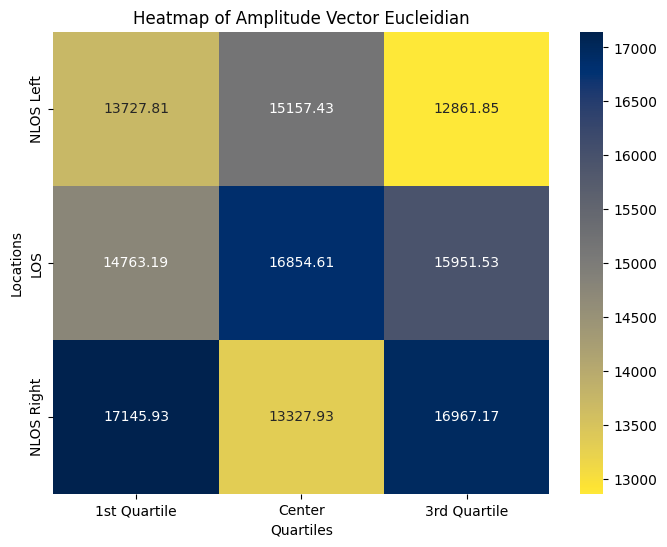

In [25]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_LOSCenter2, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [26]:
Phase_Vector_Euclidean_LOSCenter4 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile, phase_LOSCenter4),
        distance.euclidean(phase_NLOSLeftCenter, phase_LOSCenter4),
        distance.euclidean(phase_NLOSLeftThirdQuartile, phase_LOSCenter4),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile, phase_LOSCenter4),
        distance.euclidean(phase_LOSCenter, phase_LOSCenter4),
        distance.euclidean(phase_LOSThirdQuartile, phase_LOSCenter4),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile, phase_LOSCenter4),
        distance.euclidean(phase_NLOSRightCenter, phase_LOSCenter4),
        distance.euclidean(phase_NLOSRightThirdQuartile, phase_LOSCenter4),
    ],
])

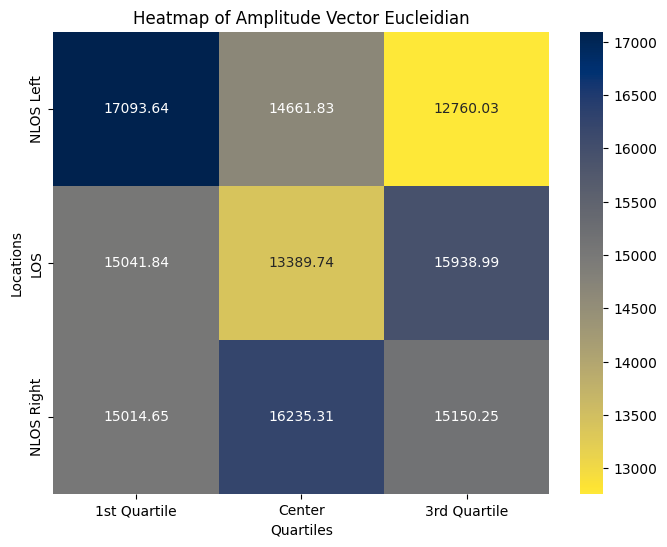

In [27]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_LOSCenter4, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [28]:
Phase_Vector_Euclidean_LOSFirstQuartile2 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile, phase_LOSFirstQuartile2),
        distance.euclidean(phase_NLOSLeftCenter, phase_LOSFirstQuartile2),
        distance.euclidean(phase_NLOSLeftThirdQuartile, phase_LOSFirstQuartile2),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile, phase_LOSFirstQuartile2),
        distance.euclidean(phase_LOSCenter, phase_LOSFirstQuartile2),
        distance.euclidean(phase_LOSThirdQuartile, phase_LOSFirstQuartile2),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile, phase_LOSFirstQuartile2),
        distance.euclidean(phase_NLOSRightCenter, phase_LOSFirstQuartile2),
        distance.euclidean(phase_NLOSRightThirdQuartile, phase_LOSFirstQuartile2),
    ],
])

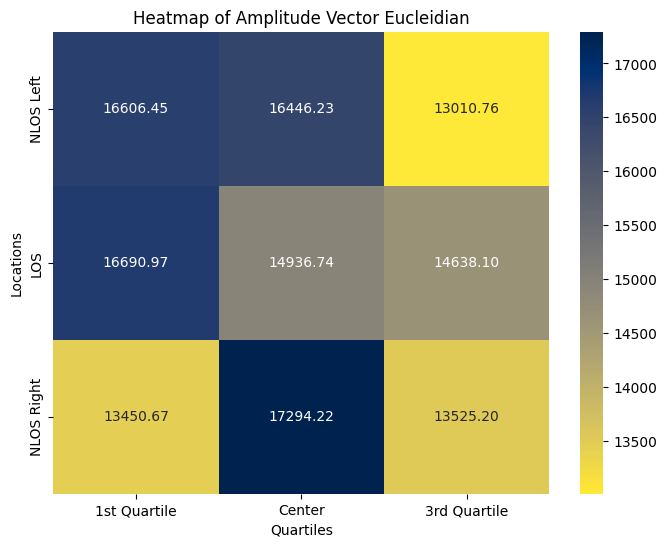

In [29]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_LOSFirstQuartile2, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [30]:
Phase_Vector_Euclidean_LOSFirstQuartile4 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile, phase_LOSFirstQuartile4),
        distance.euclidean(phase_NLOSLeftCenter, phase_LOSFirstQuartile4),
        distance.euclidean(phase_NLOSLeftThirdQuartile, phase_LOSFirstQuartile4),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile, phase_LOSFirstQuartile4),
        distance.euclidean(phase_LOSCenter, phase_LOSFirstQuartile4),
        distance.euclidean(phase_LOSThirdQuartile, phase_LOSFirstQuartile4),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile, phase_LOSFirstQuartile4),
        distance.euclidean(phase_NLOSRightCenter, phase_LOSFirstQuartile4),
        distance.euclidean(phase_NLOSRightThirdQuartile, phase_LOSFirstQuartile4),
    ],
])

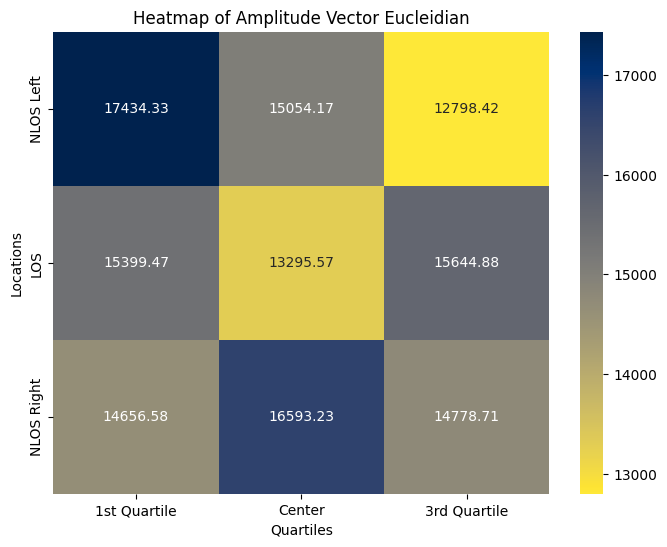

In [31]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_LOSFirstQuartile4, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [32]:
Phase_Vector_Euclidean_LOSCenter2_Cleaned = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Cleaned, phase_LOSCenter2_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Cleaned, phase_LOSCenter2_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Cleaned, phase_LOSCenter2_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Cleaned, phase_LOSCenter2_Cleaned),
        distance.euclidean(phase_LOSCenter_Cleaned, phase_LOSCenter2_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Cleaned, phase_LOSCenter2_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Cleaned, phase_LOSCenter2_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Cleaned, phase_LOSCenter2_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Cleaned, phase_LOSCenter2_Cleaned),
    ],
])

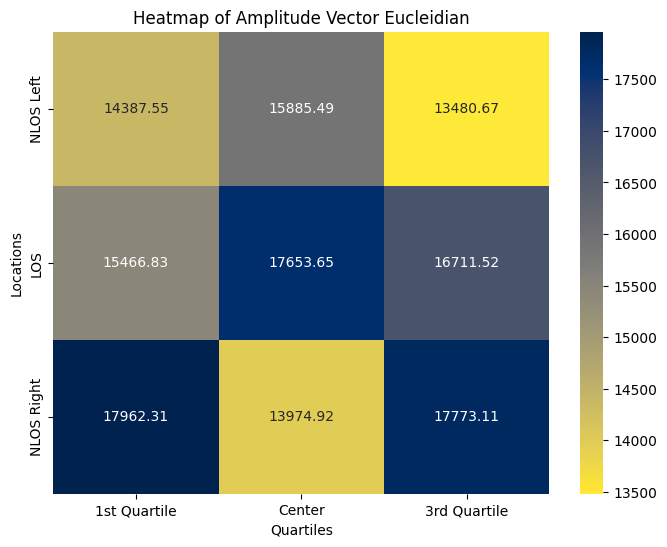

In [33]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_LOSCenter2_Cleaned, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [34]:
Phase_Vector_Euclidean_LOSCenter_Cleaned = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Cleaned, phase_LOSCenter_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Cleaned, phase_LOSCenter_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Cleaned, phase_LOSCenter_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Cleaned, phase_LOSCenter_Cleaned),
        distance.euclidean(phase_LOSCenter_Cleaned, phase_LOSCenter_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Cleaned, phase_LOSCenter_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Cleaned, phase_LOSCenter_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Cleaned, phase_LOSCenter_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Cleaned, phase_LOSCenter_Cleaned),
    ],
])

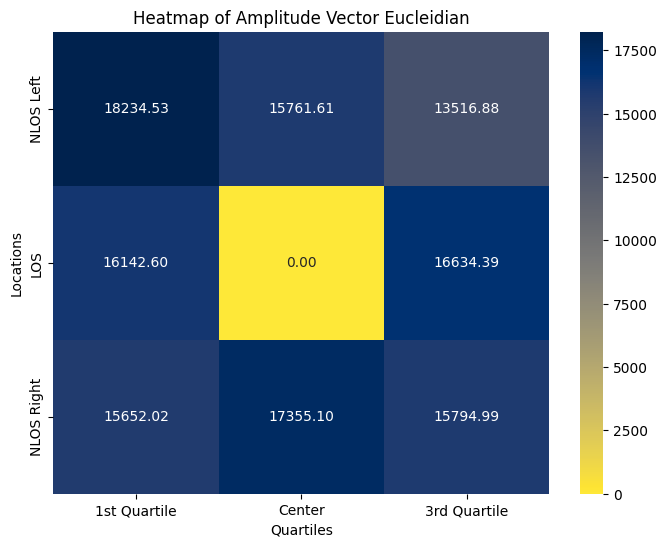

In [35]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_LOSCenter_Cleaned, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [17]:
phase_LOSCenter_Cleaned_Array1 = phase_LOSCenter_Cleaned[::2]  # Elements at odd indices (0-based)
phase_LOSCenter_Cleaned_Array2 = phase_LOSCenter_Cleaned[1::2] 


phase_NLOSLeftFirstQuartile_Cleaned_Array1 = phase_NLOSLeftFirstQuartile_Cleaned[::2]
phase_NLOSLeftFirstQuartile_Cleaned_Array2 = phase_NLOSLeftFirstQuartile_Cleaned[1::2]
phase_NLOSLeftCenter_Cleaned_Array1 = phase_NLOSLeftCenter_Cleaned[::2]
phase_NLOSLeftCenter_Cleaned_Array2 = phase_NLOSLeftCenter_Cleaned[1::2]
phase_NLOSLeftThirdQuartile_Cleaned_Array1 = phase_NLOSLeftThirdQuartile_Cleaned[::2]
phase_NLOSLeftThirdQuartile_Cleaned_Array2 = phase_NLOSLeftThirdQuartile_Cleaned[1::2]
phase_LOSFirstQuartile_Cleaned_Array1 = phase_LOSFirstQuartile_Cleaned[::2]
phase_LOSFirstQuartile_Cleaned_Array2 = phase_LOSFirstQuartile_Cleaned[1::2]

phase_LOSThirdQuartile_Cleaned_Array1 = phase_LOSThirdQuartile_Cleaned[::2] 
phase_LOSThirdQuartile_Cleaned_Array2 = phase_LOSThirdQuartile_Cleaned[1::2] 
phase_NLOSRightFirstQuartile_Cleaned_Array1 = phase_NLOSRightFirstQuartile_Cleaned[::2]
phase_NLOSRightFirstQuartile_Cleaned_Array2 = phase_NLOSRightFirstQuartile_Cleaned[1::2]
phase_NLOSRightCenter_Cleaned_Array1 = phase_NLOSRightCenter_Cleaned[::2] 
phase_NLOSRightCenter_Cleaned_Array2 = phase_NLOSRightCenter_Cleaned[1::2] 
phase_NLOSRightThirdQuartile_Cleaned_Array1 = phase_NLOSRightThirdQuartile_Cleaned[::2]
phase_NLOSRightThirdQuartile_Cleaned_Array2 = phase_NLOSRightThirdQuartile_Cleaned[1::2] 

phase_LOSFirstQuartile2_Cleaned_Array1 = phase_LOSFirstQuartile2_Cleaned[::2] 
phase_LOSFirstQuartile2_Cleaned_Array2 = phase_LOSFirstQuartile2_Cleaned[1::2] 
phase_LOSCenter2_Cleaned_Array1 = phase_LOSCenter2_Cleaned[::2] 
phase_LOSCenter2_Cleaned_Array2 = phase_LOSCenter2_Cleaned[1::2] 

In [19]:
Phase_Vector_Euclidean_LOSCenter_Cleaned_Array = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Cleaned_Array1[:-1], phase_LOSCenter_Cleaned_Array2),
        distance.euclidean(phase_NLOSLeftCenter_Cleaned_Array1[:-1], phase_LOSCenter_Cleaned_Array2),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Cleaned_Array1[:-1], phase_LOSCenter_Cleaned_Array2),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Cleaned_Array1[:-1], phase_LOSCenter_Cleaned_Array2),
        distance.euclidean(phase_LOSCenter_Cleaned_Array1[:-1], phase_LOSCenter_Cleaned_Array2),
        distance.euclidean(phase_LOSThirdQuartile_Cleaned_Array1[:-1], phase_LOSCenter_Cleaned_Array2),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Cleaned_Array1[:-1], phase_LOSCenter_Cleaned_Array2),
        distance.euclidean(phase_NLOSRightCenter_Cleaned_Array1[:-1], phase_LOSCenter_Cleaned_Array2),
        distance.euclidean(phase_NLOSRightThirdQuartile_Cleaned_Array1[:-1], phase_LOSCenter_Cleaned_Array2),
    ],
])

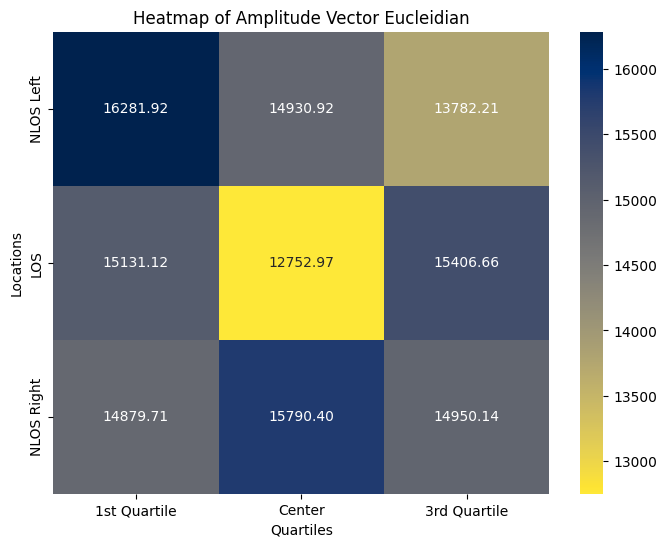

In [20]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_LOSCenter_Cleaned_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [21]:
Phase_Vector_Euclidean_NLOSLeftThirdQuartile_Cleaned_Array = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Cleaned_Array1[:-1], phase_NLOSLeftThirdQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSLeftCenter_Cleaned_Array1[:-1], phase_NLOSLeftThirdQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Cleaned_Array1[:-1], phase_NLOSLeftThirdQuartile_Cleaned_Array2),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Cleaned_Array1[:-1], phase_NLOSLeftThirdQuartile_Cleaned_Array2),
        distance.euclidean(phase_LOSCenter_Cleaned_Array1[:-1], phase_NLOSLeftThirdQuartile_Cleaned_Array2),
        distance.euclidean(phase_LOSThirdQuartile_Cleaned_Array1[:-1], phase_NLOSLeftThirdQuartile_Cleaned_Array2),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Cleaned_Array1[:-1], phase_NLOSLeftThirdQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSRightCenter_Cleaned_Array1[:-1], phase_NLOSLeftThirdQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSRightThirdQuartile_Cleaned_Array1[:-1], phase_NLOSLeftThirdQuartile_Cleaned_Array2),
    ],
])

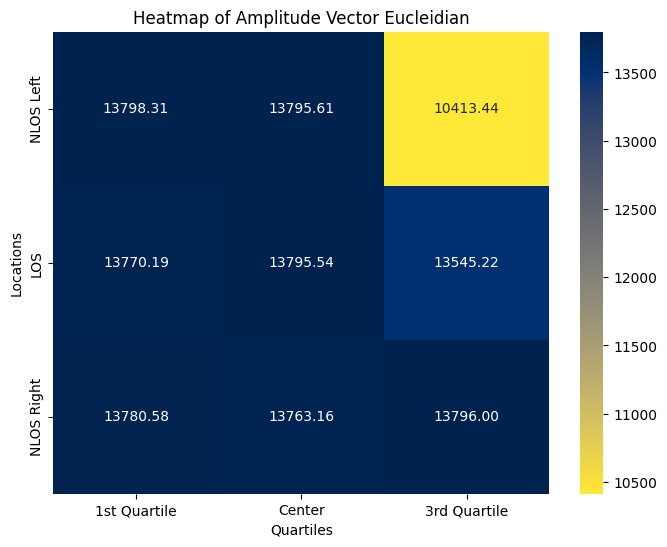

In [22]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_NLOSLeftThirdQuartile_Cleaned_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

### Heat map layered

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import matplotlib.pyplot as plt

cmap_name = 'yellow_to_blue'
n_bins = 100
colors = [(1, 1, 0), (0, 0, 1)]
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the first heatmap with full opacity (alpha = 1)
ax.imshow(Amplitude_Vector_Eucleidian_LOSFirstQuartile, cmap='YlGnBu', interpolation='nearest', alpha=0.9)

# Plot the second heatmap with reduced opacity (alpha = 0.7)
ax.imshow(Phase_Vector_Euclidean_LOSFirstQuartile, cmap='YlGnBu', interpolation='nearest', alpha=0.7)
ax.imshow(Phase_Vector_Euclidean_LOSFirstQuartile, cmap='YlGnBu', interpolation='nearest', alpha=0.5)
# Show the plot
plt.show()